In [1]:
import sys
import os
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))) # add parent directory to path

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import json
import glob
import random
from btbench.btbench_config import *
from subject_braintreebank import Subject
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'analyses/font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 12})


# Plots over time

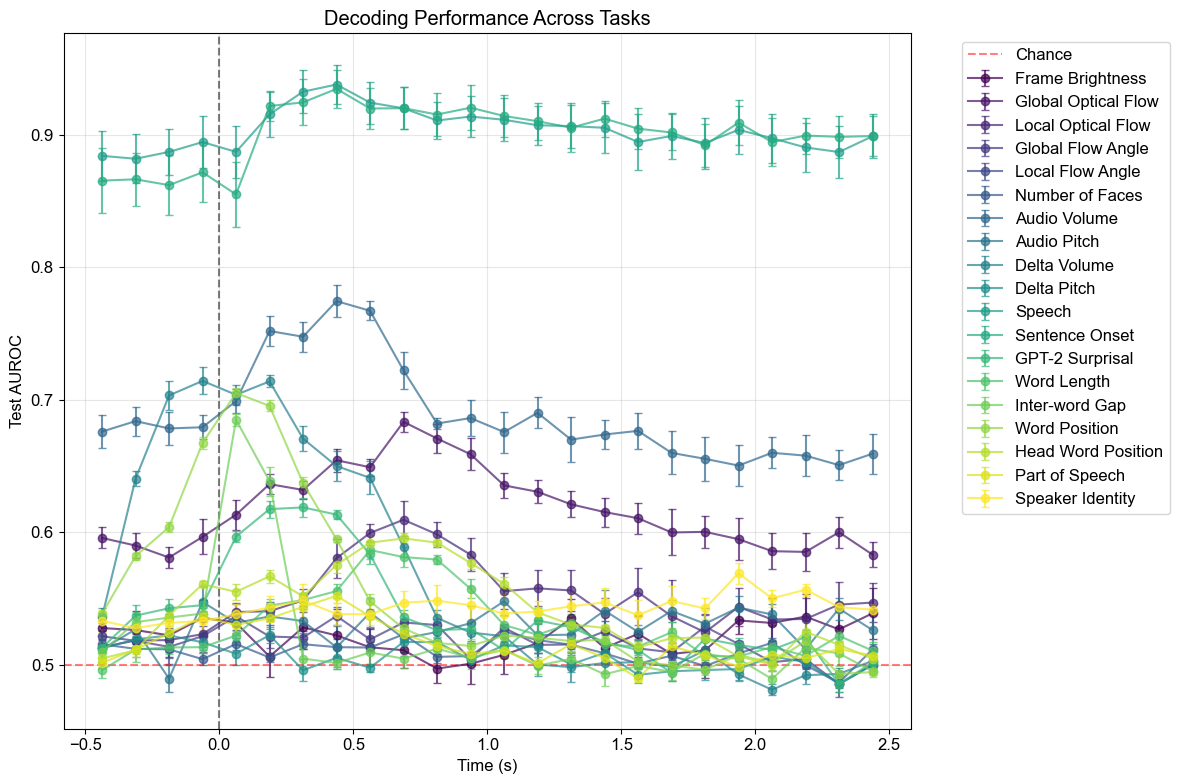

In [7]:
subject_id, trial_id = 3, 0
eval_names = [
    "frame_brightness",
    "global_flow", 
    "local_flow",
    "global_flow_angle",
    #"local_flow_angle",
    "face_num",
    "volume",
    "pitch", 
    "delta_volume",
    "delta_pitch",
    "speech",
    "onset",
    "gpt2_surprisal",
    "word_length",
    "word_gap", 
    "word_index",
    "word_head_pos",
    "word_part_speech",
    "speaker"
]
model_dir = "M_nst8_dm192_nh12_nl5_5_lr0.003_rSL1"

task_name_mapping = {
    'onset': 'Sentence Onset',
    'speech': 'Speech',
    'volume': 'Audio Volume', 
    'pitch': 'Audio Pitch',
    'speaker': 'Speaker Identity',
    'delta_volume': 'Delta Volume',
    'delta_pitch': 'Delta Pitch',
    'gpt2_surprisal': 'GPT-2 Surprisal',
    'word_length': 'Word Length',
    'word_gap': 'Inter-word Gap',
    'word_index': 'Word Position',
    'word_head_pos': 'Head Word Position',
    'word_part_speech': 'Part of Speech',
    'frame_brightness': 'Frame Brightness',
    'global_flow': 'Global Optical Flow',
    'local_flow': 'Local Optical Flow',
    'global_flow_angle': 'Global Flow Angle',
    'local_flow_angle': 'Local Flow Angle',
    'face_num': 'Number of Faces',
}

# Create a single figure
plt.figure(figsize=(12, 8))

# Get colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(eval_names)))

for eval_idx, eval_name in enumerate(eval_names):
    # Load results for this eval
    results_path = f'analyses/eval_results/{model_dir}/frozen_population_btbank{subject_id}_{trial_id}_{eval_name}.json'
    with open(results_path) as f:
        results = json.load(f)['evaluation_results'][f'btbank{subject_id}_{trial_id}']['population']
    
    # Extract time bins data
    time_bins = results['time_bins']
    
    # Prepare data for plotting
    time_points = [(tb['time_bin_start'] + tb['time_bin_end'])/2 for tb in time_bins]
    test_aurocs = []
    test_aurocs_sem = []
    
    # Calculate mean and SEM for each time bin
    for time_bin in time_bins:
        fold_aurocs = [fold['test_roc_auc'] for fold in time_bin['folds']]
        mean_auroc = np.mean(fold_aurocs)
        sem_auroc = np.std(fold_aurocs) / np.sqrt(len(fold_aurocs))
        test_aurocs.append(mean_auroc)
        test_aurocs_sem.append(sem_auroc)
    
    # Plot with error bars
    plt.errorbar(time_points, test_aurocs, yerr=test_aurocs_sem,
                label=task_name_mapping[eval_name], marker='o', capsize=3,
                color=colors[eval_idx], alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Test AUROC')
plt.title('Decoding Performance Across Tasks')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Chance')  # Chance level
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)  # Vertical line at t=0
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

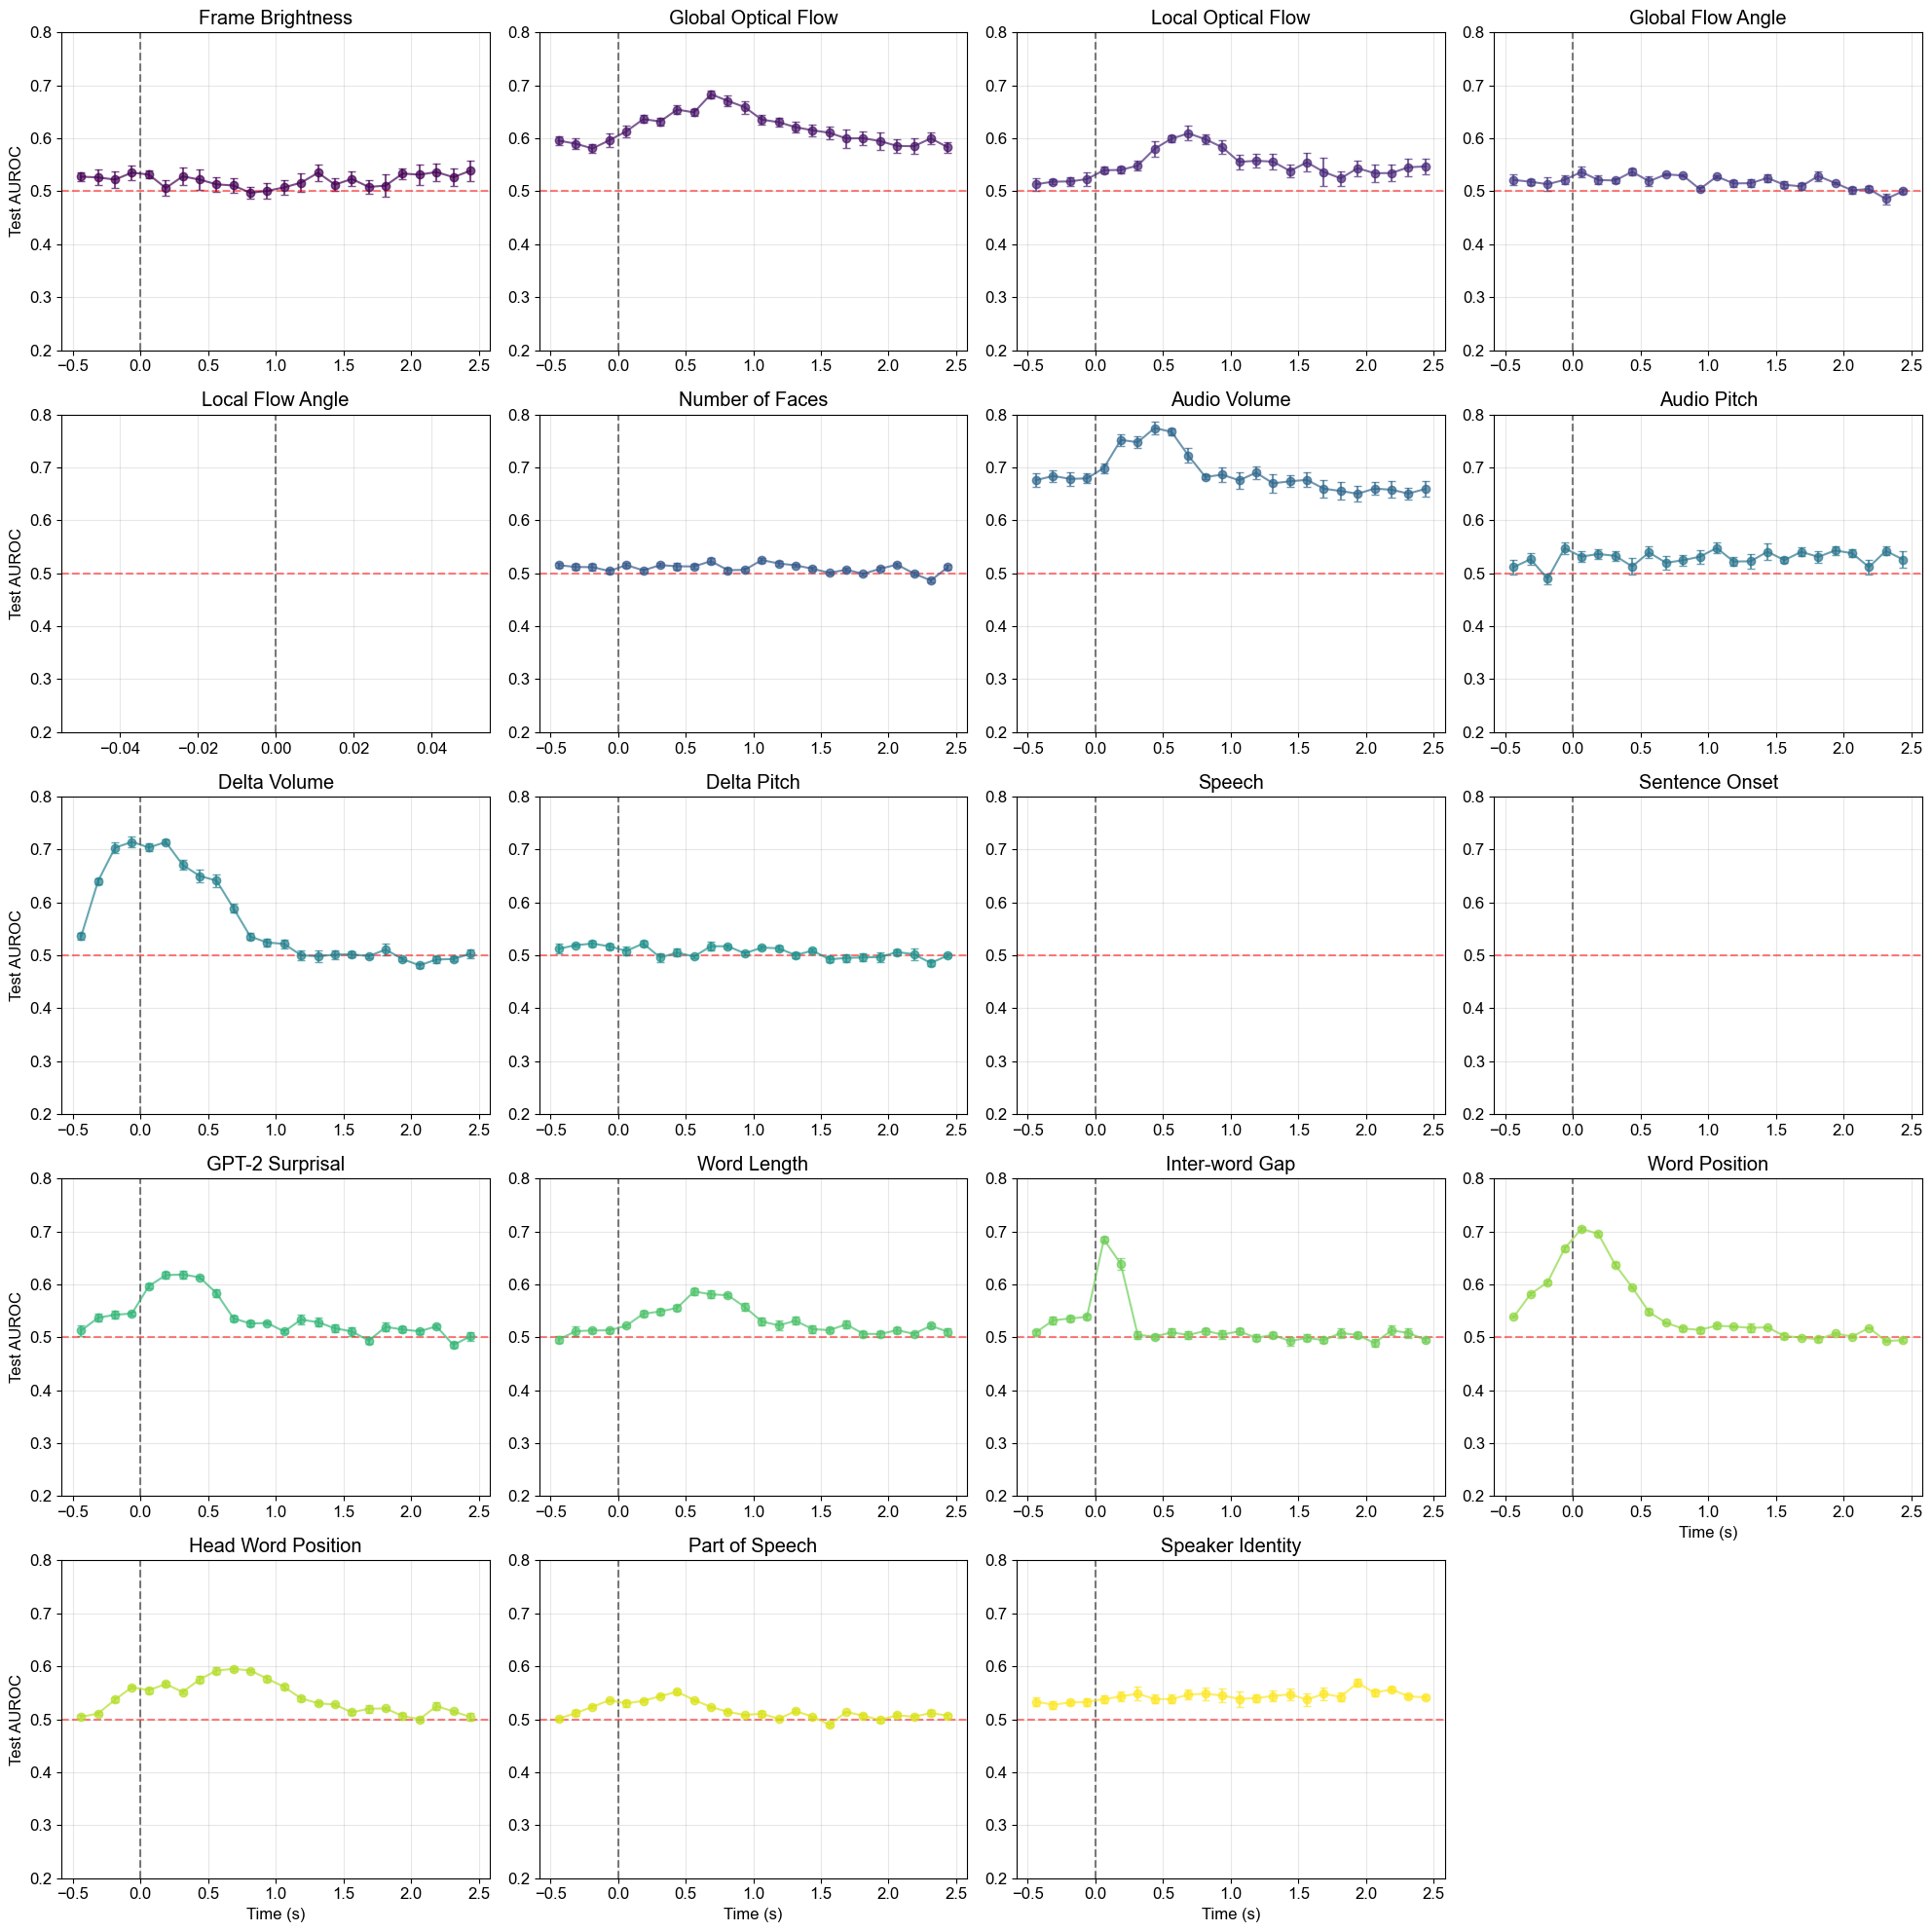

In [8]:
subject_id, trial_id = 3, 0
eval_names = [
    "frame_brightness",
    "global_flow", 
    "local_flow",
    "global_flow_angle",
    #"local_flow_angle",
    "face_num",
    "volume",
    "pitch", 
    "delta_volume",
    "delta_pitch",
    "speech",
    "onset",
    "gpt2_surprisal",
    "word_length",
    "word_gap", 
    "word_index",
    "word_head_pos",
    "word_part_speech",
    "speaker"
]
model_dir = "M_nst8_dm192_nh12_nl5_5_lr0.003_rSL1"

task_name_mapping = {
    'onset': 'Sentence Onset',
    'speech': 'Speech',
    'volume': 'Audio Volume', 
    'pitch': 'Audio Pitch',
    'speaker': 'Speaker Identity',
    'delta_volume': 'Delta Volume',
    'delta_pitch': 'Delta Pitch',
    'gpt2_surprisal': 'GPT-2 Surprisal',
    'word_length': 'Word Length',
    'word_gap': 'Inter-word Gap',
    'word_index': 'Word Position',
    'word_head_pos': 'Head Word Position',
    'word_part_speech': 'Part of Speech',
    'frame_brightness': 'Frame Brightness',
    'global_flow': 'Global Optical Flow',
    'local_flow': 'Local Optical Flow',
    'global_flow_angle': 'Global Flow Angle',
    'local_flow_angle': 'Local Flow Angle',
    'face_num': 'Number of Faces',
}

# Calculate number of rows and columns for subplots
n_plots = len(eval_names)
n_cols = 4  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

# Get colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(eval_names)))

for eval_idx, eval_name in enumerate(eval_names):
    ax = axes[eval_idx]
    
    # Load results for this eval
    results_path = f'analyses/eval_results/{model_dir}/frozen_population_btbank{subject_id}_{trial_id}_{eval_name}.json'
    with open(results_path) as f:
        results = json.load(f)['evaluation_results'][f'btbank{subject_id}_{trial_id}']['population']
    
    # Extract time bins data
    time_bins = results['time_bins']
    
    # Prepare data for plotting
    time_points = [(tb['time_bin_start'] + tb['time_bin_end'])/2 for tb in time_bins]
    test_aurocs = []
    test_aurocs_sem = []
    
    # Calculate mean and SEM for each time bin
    for time_bin in time_bins:
        fold_aurocs = [fold['test_roc_auc'] for fold in time_bin['folds']]
        mean_auroc = np.mean(fold_aurocs)
        sem_auroc = np.std(fold_aurocs) / np.sqrt(len(fold_aurocs))
        test_aurocs.append(mean_auroc)
        test_aurocs_sem.append(sem_auroc)
    
    # Plot with error bars
    ax.errorbar(time_points, test_aurocs, yerr=test_aurocs_sem,
               marker='o', capsize=3, color=colors[eval_idx], alpha=0.7)
    
    ax.set_title(task_name_mapping[eval_name])
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Chance level
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)  # Vertical line at t=0
    ax.set_ylim(0.5, 1.0)  # Set consistent y-axis limits
    
    # Only add x and y labels for edge plots
    if eval_idx >= len(eval_names) - n_cols:  # Bottom row
        ax.set_xlabel('Time (s)')
    if eval_idx % n_cols == 0:  # Leftmost column
        ax.set_ylabel('Test AUROC')

# Hide empty subplots
for idx in range(eval_idx + 1, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

/net/vast-storage/scratch/vast/yanglab/zaho/bfm_ic2/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/net/vast-storage/scratch/vast/yanglab/zaho/bfm_ic2/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/net/vast-storage/scratch/vast/yanglab/zaho/bfm_ic2/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/net/vast-storage/scratch/vast/yanglab/zaho/bfm_ic2/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/net/vast-storage/scratch/vast/yanglab/zaho/bfm_ic2/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: inval

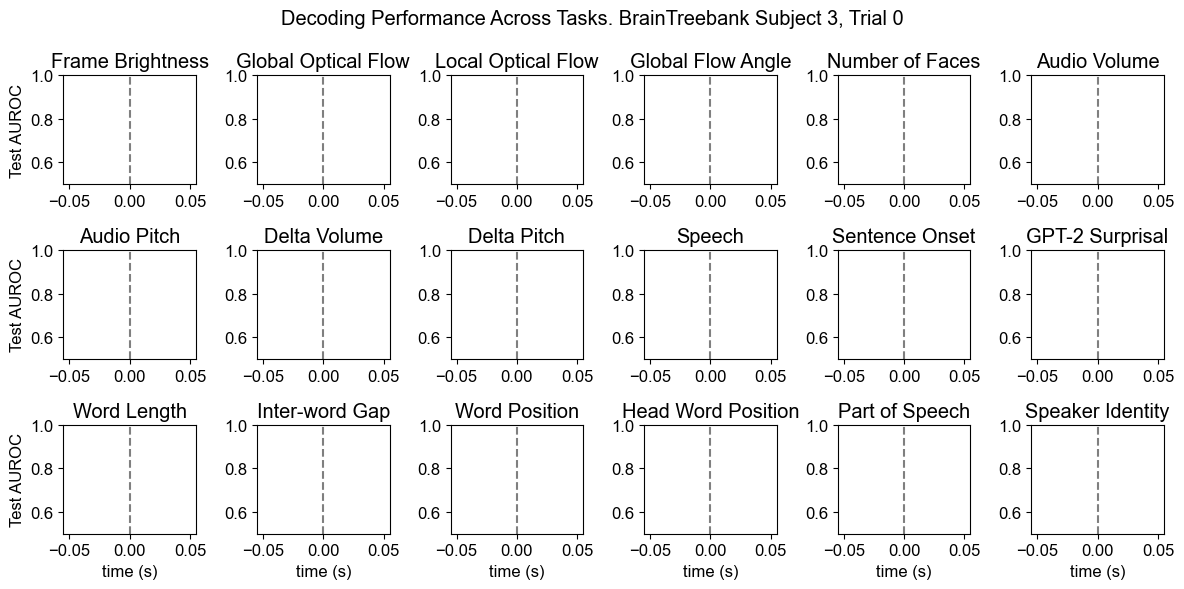

In [2]:
subject_id, trial_id = 3, 0
eval_names = [
    "frame_brightness",
    "global_flow", 
    "local_flow",
    "global_flow_angle",
    #"local_flow_angle",
    "face_num",
    "volume",
    "pitch", 
    "delta_volume",
    "delta_pitch",
    "speech",
    "onset",
    "gpt2_surprisal",
    "word_length",
    "word_gap", 
    "word_index",
    "word_head_pos",
    "word_part_speech",
    "speaker"
]
model_dir = "M_nst8_dm192_nh12_nl5_5_lr0.003_rSL1"

task_name_mapping = {
    'onset': 'Sentence Onset',
    'speech': 'Speech',
    'volume': 'Audio Volume', 
    'pitch': 'Audio Pitch',
    'speaker': 'Speaker Identity',
    'delta_volume': 'Delta Volume',
    'delta_pitch': 'Delta Pitch',
    'gpt2_surprisal': 'GPT-2 Surprisal',
    'word_length': 'Word Length',
    'word_gap': 'Inter-word Gap',
    'word_index': 'Word Position',
    'word_head_pos': 'Head Word Position',
    'word_part_speech': 'Part of Speech',
    'frame_brightness': 'Frame Brightness',
    'global_flow': 'Global Optical Flow',
    'local_flow': 'Local Optical Flow',
    'global_flow_angle': 'Global Flow Angle',
    'local_flow_angle': 'Local Flow Angle',
    'face_num': 'Number of Faces',
}

# Calculate number of rows and columns for subplots
n_plots = len(eval_names)
n_cols = 6  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2*n_rows))
axes = axes.flatten()

# Get colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(eval_names)))

for eval_idx, eval_name in enumerate(eval_names):
    ax = axes[eval_idx]
    
    # Load results for this eval
    results_path = f'analyses/eval_results/{model_dir}/frozen_population_btbank{subject_id}_{trial_id}_{eval_name}.json'
    with open(results_path) as f:
        results = json.load(f)['evaluation_results'][f'btbank{subject_id}_{trial_id}']['population']
    
    # Extract time bins data
    time_bins = results['time_bins']
    
    # Prepare data for plotting
    time_points = [(tb['time_bin_start'] + tb['time_bin_end'])/2 for tb in time_bins]
    test_aurocs = []
    test_aurocs_sem = []
    
    # Calculate mean and SEM for each time bin
    for time_bin in time_bins:
        fold_aurocs = [fold['test_roc_auc'] for fold in time_bin['folds']]
        mean_auroc = np.mean(fold_aurocs)
        sem_auroc = np.std(fold_aurocs) / np.sqrt(len(fold_aurocs))
        test_aurocs.append(mean_auroc)
        test_aurocs_sem.append(sem_auroc)
    
    # Plot with error bars
    ax.errorbar(time_points, test_aurocs, yerr=test_aurocs_sem,
               marker='o', capsize=3, color=colors[eval_idx], alpha=0.7)
    
    ax.set_title(task_name_mapping[eval_name])
    #ax.grid(True, alpha=0.3)
    #ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Chance level
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)  # Vertical line at t=0
    ax.set_ylim(0.5, 1.0)  # Set consistent y-axis limits
    
    # Only add x and y labels for edge plots
    if eval_idx >= len(eval_names) - n_cols:  # Bottom row
        ax.set_xlabel('time (s)')
    if eval_idx % n_cols == 0:  # Leftmost column
        ax.set_ylabel('Test AUROC')

# Hide empty subplots
for idx in range(eval_idx + 1, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(f'Decoding Performance Across Tasks. BrainTreebank Subject {subject_id}, Trial {trial_id}')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'analyses/eval_results/M_nst8_dm192_nh12_nl5_5_lr0.003_rSL1/frozen_population_btbank7_0_word_index.json'

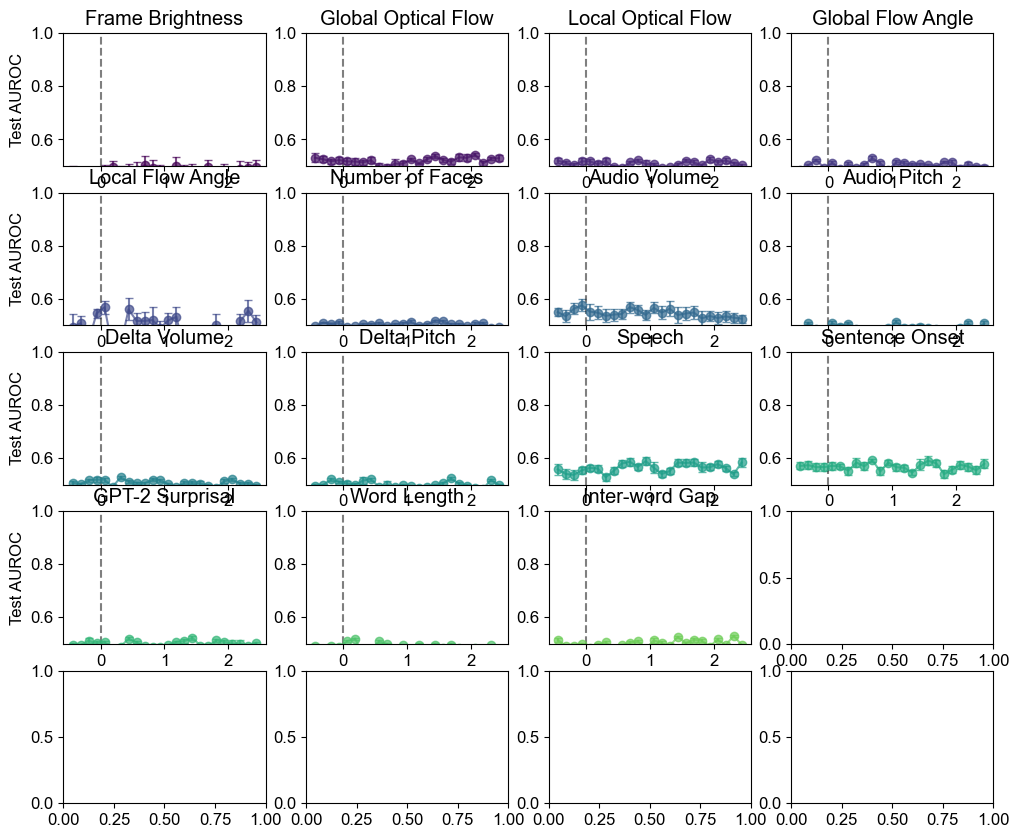

In [12]:
subject_id, trial_id = 7, 0
eval_names = [
    "frame_brightness",
    "global_flow", 
    "local_flow",
    "global_flow_angle",
    "local_flow_angle",
    "face_num",
    "volume",
    "pitch", 
    "delta_volume",
    "delta_pitch",
    "speech",
    "onset",
    "gpt2_surprisal",
    "word_length",
    "word_gap", 
    "word_index",
    "word_head_pos",
    "word_part_speech",
    "speaker"
]
model_dir = "M_nst8_dm192_nh12_nl5_5_lr0.003_rSL1"

task_name_mapping = {
    'onset': 'Sentence Onset',
    'speech': 'Speech',
    'volume': 'Audio Volume', 
    'pitch': 'Audio Pitch',
    'speaker': 'Speaker Identity',
    'delta_volume': 'Delta Volume',
    'delta_pitch': 'Delta Pitch',
    'gpt2_surprisal': 'GPT-2 Surprisal',
    'word_length': 'Word Length',
    'word_gap': 'Inter-word Gap',
    'word_index': 'Word Position',
    'word_head_pos': 'Head Word Position',
    'word_part_speech': 'Part of Speech',
    'frame_brightness': 'Frame Brightness',
    'global_flow': 'Global Optical Flow',
    'local_flow': 'Local Optical Flow',
    'global_flow_angle': 'Global Flow Angle',
    'local_flow_angle': 'Local Flow Angle',
    'face_num': 'Number of Faces',
}

# Calculate number of rows and columns for subplots
n_plots = len(eval_names)
n_cols = 4  # You can adjust this
n_rows = (n_plots + n_cols - 1) // n_cols

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2*n_rows))
axes = axes.flatten()

# Get colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(eval_names)))

for eval_idx, eval_name in enumerate(eval_names):
    ax = axes[eval_idx]
    
    # Load results for this eval
    results_path = f'analyses/eval_results/{model_dir}/frozen_population_btbank{subject_id}_{trial_id}_{eval_name}.json'
    with open(results_path) as f:
        results = json.load(f)['evaluation_results'][f'btbank{subject_id}_{trial_id}']['population']
    
    # Extract time bins data
    time_bins = results['time_bins']
    
    # Prepare data for plotting
    time_points = [(tb['time_bin_start'] + tb['time_bin_end'])/2 for tb in time_bins]
    test_aurocs = []
    test_aurocs_sem = []
    
    # Calculate mean and SEM for each time bin
    for time_bin in time_bins:
        fold_aurocs = [fold['test_roc_auc'] for fold in time_bin['folds']]
        mean_auroc = np.mean(fold_aurocs)
        sem_auroc = np.std(fold_aurocs) / np.sqrt(len(fold_aurocs))
        test_aurocs.append(mean_auroc)
        test_aurocs_sem.append(sem_auroc)
    
    # Plot with error bars
    ax.errorbar(time_points, test_aurocs, yerr=test_aurocs_sem,
               marker='o', capsize=3, color=colors[eval_idx], alpha=0.7)
    
    ax.set_title(task_name_mapping[eval_name])
    #ax.grid(True, alpha=0.3)
    #ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Chance level
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)  # Vertical line at t=0
    ax.set_ylim(0.5, 1.0)  # Set consistent y-axis limits
    
    # Only add x and y labels for edge plots
    if eval_idx >= len(eval_names) - n_cols:  # Bottom row
        ax.set_xlabel('time (s)')
    if eval_idx % n_cols == 0:  # Leftmost column
        ax.set_ylabel('Test AUROC')

# Hide empty subplots
for idx in range(eval_idx + 1, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(f'Decoding Performance Across Tasks. BrainTreebank Subject {subject_id}, Trial {trial_id}')

plt.tight_layout()
plt.show()